In [3]:
import torch
from utils import myGRU4Rec

experiment_main = 'jp:es:mx:uk:ca:us2br:in:it:de:au:fr'

F = 768
L = 2

confounder = 2
db = 1
f = 128

r_list = [1.0, 10.0, 100.0, 1000.0]

train_domain_list = ['jp','es','mx','uk','ca','us']
train_prefix = ':'.join(train_domain_list)

In [4]:
mean_norm_list = []
domain_norm_list = {}
for train_domain in train_domain_list:
    domain_norm_list[train_domain] =[]

for r in r_list:

    experiment_sub = 'c='+str(confounder)+'_db='+str(db)+'_r='+str(r)+'_f='+str(f)

    save_folder = 'experiments/'+experiment_main+'/'+experiment_sub+'/'+train_prefix

    model = myGRU4Rec(F,f,L,train_domain_list)
    model.load_state_dict(torch.load(save_folder+'/model.pt'))
    
    mean_norm_list.append(torch.sum(model.init_domain**2).detach().numpy())
    
    for i in np.arange(model.init_domain.shape[0]):
        domain_norm_list[train_domain_list[i]].append(torch.sum(model.init_domain[i]**2).detach().numpy())
    
    

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/jp:es:mx:uk:ca:us2br:in:it:de:au:fr/c=2_db=1_r=1.0_f=128/jp:es:mx:uk:ca:us/model.pt'

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

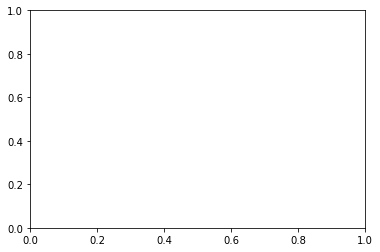

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot([np.log10(r) for r in r_list], [np.log10(norm) for norm in mean_norm_list])
plt.xlabel('np.log10(regularization)')
plt.ylabel('np.log10(mean norm)')
plt.title('effect of regularization on domain confounder vector')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
for key in domain_norm_list.keys():
    plt.plot([np.log10(r) for r in r_list], [np.log10(norm) for norm in domain_norm_list[key]], label=key)
    plt.xlabel('np.log10(regularization)')
    plt.ylabel('np.log10(mean norm)')
plt.title('effect of regularization on domain confounder vector')
plt.legend()
plt.show()

In [48]:
vs = model.init_domain
for i in np.arange(6):
    for j in np.arange(6):
        for k in np.arange(6):
            if (i!=j) and (i!=k) and (j!=k):
                print(torch.sum((vs[i]-vs[j])**2)/torch.sum((vs[i]-vs[k])**2))

tensor(0.9545, grad_fn=<DivBackward0>)
tensor(0.6982, grad_fn=<DivBackward0>)
tensor(0.8696, grad_fn=<DivBackward0>)
tensor(0.7935, grad_fn=<DivBackward0>)
tensor(1.0477, grad_fn=<DivBackward0>)
tensor(0.7315, grad_fn=<DivBackward0>)
tensor(0.9111, grad_fn=<DivBackward0>)
tensor(0.8313, grad_fn=<DivBackward0>)
tensor(1.4323, grad_fn=<DivBackward0>)
tensor(1.3671, grad_fn=<DivBackward0>)
tensor(1.2456, grad_fn=<DivBackward0>)
tensor(1.1365, grad_fn=<DivBackward0>)
tensor(1.1499, grad_fn=<DivBackward0>)
tensor(1.0976, grad_fn=<DivBackward0>)
tensor(0.8029, grad_fn=<DivBackward0>)
tensor(0.9124, grad_fn=<DivBackward0>)
tensor(1.2603, grad_fn=<DivBackward0>)
tensor(1.2029, grad_fn=<DivBackward0>)
tensor(0.8799, grad_fn=<DivBackward0>)
tensor(1.0960, grad_fn=<DivBackward0>)
tensor(1.4204, grad_fn=<DivBackward0>)
tensor(1.2034, grad_fn=<DivBackward0>)
tensor(1.3373, grad_fn=<DivBackward0>)
tensor(1.4069, grad_fn=<DivBackward0>)
tensor(0.7040, grad_fn=<DivBackward0>)
tensor(0.8473, grad_fn=<D